In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import f1_score, accuracy_score, roc_curve, auc
from sklearn.metrics import mean_absolute_error as mae
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('input/CMS_trigger.csv')
parameters = np.array(df.loc[:,'q/pt':])
q_pt = parameters[:,0]
pT = abs(1/q_pt) # GeV
pT_tr, pT_ts, inv_pT_tr, inv_pT_ts = train_test_split(pT, 1/pT, test_size = 0.2, random_state = 1)

In [84]:
pred_fcnn_inv_ptloss = np.array(pd.read_csv('results/fcnn_invpt_ptloss.csv')['0'])
pred_fcnn_pT_ptloss = np.array(pd.read_csv('results/fcnn_pt_ptloss.csv')['0'])
# pred_cnn_inv_ptloss = np.array(pd.read_csv('results/cnn_invpt_ptloss.csv')['0'])
# pred_cnn_pT_ptloss = np.array(pd.read_csv('results/cnn_pt_ptloss.csv')['0'])
pred_cnn_inv_ptloss = np.array(pd.read_csv('results/cnn_invpt_ptloss_v61.csv')['0'])
pred_cnn_pT_ptloss = np.array(pd.read_csv('results/cnn_pt_ptloss_v61.csv')['0'])
# pred_gnn_inv_mse = np.array(pd.read_csv('results/GNN v4 invpt.csv')['0']) # mse_built-in
# pred_gnn_pT_mse = np.array(pd.read_csv('results/GNN Torch GSoC v5inv_0.csv')['0']) # # mse_built-in
pred_gnn_inv_mse = np.array(pd.read_csv('results/GNN Torch GSoC v9 ptloss inv_1_7feat.csv')['0']) # mse_custom
pred_gnn_pT_mse = np.array(pd.read_csv('results/GNN Torch GSoC v9 ptloss inv_0_7feat.csv')['0']) # mse_custom
pred_gnn_inv_ptloss = np.array(pd.read_csv('results/GNN Torch GSoC v7 ptloss inv_1.csv')['0'])
# pred_gnn_pT_ptloss = np.array(pd.read_csv('results/GNN Torch GSoC v7 ptloss inv_0.csv')['0'])
pred_gnn_pT_ptloss = np.array(pd.read_csv('results/GNN_v10_inv_0_ptloss_7feats.csv')['0'])
pred_gnn_pT_ptloss_graphModif = np.array(pd.read_csv('results/GNN_v11_inv_0_graph_mod.csv')['0'])
pred_gnn_inv_ptloss_graphModif = np.array(pd.read_csv('results/GNN_v11_inv_1_graph_mod.csv')['0'])
pred_gnn_pT_ptloss_multi1 = np.array(pd.read_csv('results/GNN_v16_Multitask_inv_0_ver2.csv')['0'])
pred_gnn_inv_ptloss_multi1 = np.array(pd.read_csv('results/GNN_v16_Multitask_inv_1_2.csv')['0'])
# pred_gnn_pT_ptloss_multi2 = np.array(pd.read_csv('results/GNN_v16_Multitask_inv_0_ver3.csv')['0'])
# pred_gnn_pT_ptloss_multi4 = np.array(pd.read_csv('results/GNN_v16_Multitask_inv_0_ver4.csv')['0'])
# pred_gnn_pT_ptloss_multi5 = np.array(pd.read_csv('results/GNN_v16_Multitask_inv_0_ver5.csv')['0'])
pred_feat_fuse = np.array(pd.read_csv('results/GNN_v18_Merge_inv_0.csv')['0'])
pred_feat_fuse_inv = np.array(pd.read_csv('results/GNN_v18_Merge_inv_1.csv')['0'])
pred_dec_fuse = np.mean([pred_fcnn_pT_ptloss, pred_cnn_pT_ptloss, pred_gnn_pT_ptloss_multi1],0)
pred_dec_fuse_inv = np.mean([pred_fcnn_pT_ptloss, pred_cnn_pT_ptloss, pred_gnn_pT_ptloss_multi1],0)
print(pred_cnn_pT_ptloss.shape)
print(pred_dec_fuse.shape)

(235872,)
(235872,)


In [6]:
def mae_comp(y_true,y_pred,inv):
    if inv == 1:
        y_true = 1/y_true
        y_pred = 1/y_pred
        
    maex = []
    for i in tqdm(range(15,100),position=0):
        cnd1 = y_true > i-10 
        cnd2 = y_true < i+10
        indices = [j for j in range(len(y_true)) if cnd1[j] and cnd2[j]]
        maex.append(mae(y_true[indices],y_pred[indices]))
    return maex

In [71]:
# MAE

mae_fcnn_inv_ptloss = mae_comp(inv_pT_ts,pred_fcnn_inv_ptloss,1)
mae_fcnn_pT_ptloss = mae_comp(pT_ts,pred_fcnn_pT_ptloss,0)
mae_cnn_inv_ptloss = mae_comp(inv_pT_ts,pred_cnn_inv_ptloss,1)
mae_cnn_pT_ptloss = mae_comp(pT_ts,pred_cnn_pT_ptloss,0)
mae_gnn_inv_mse = mae_comp(inv_pT_ts,pred_gnn_inv_mse,1)
mae_gnn_pT_mse = mae_comp(pT_ts,pred_gnn_pT_mse,0)
# mae_gnn_inv_ptloss = mae_comp(inv_pT_ts,pred_gnn_inv_ptloss,1)
# mae_gnn_pT_ptloss = mae_comp(pT_ts,pred_gnn_pT_ptloss,0)
# mae_gnn_inv_ptloss_graphMod = mae_comp(inv_pT_ts,pred_gnn_inv_ptloss_graphModif,1)
mae_gnn_pT_ptloss_graphMod = mae_comp(pT_ts,pred_gnn_pT_ptloss_graphModif,0)
mae_gnn_pT_ptloss_multi1 = mae_comp(pT_ts,pred_gnn_pT_ptloss_multi1,0)
mae_gnn_inv_ptloss_multi1 = mae_comp(pT_ts,pred_gnn_inv_ptloss_multi1,0)
# mae_gnn_pT_ptloss_multi2 = mae_comp(pT_ts,pred_gnn_pT_ptloss_multi2,0)
# mae_gnn_pT_ptloss_multi4 = mae_comp(pT_ts,pred_gnn_pT_ptloss_multi4,0)
# mae_gnn_pT_ptloss_multi5 = mae_comp(pT_ts,pred_gnn_pT_ptloss_multi5,0)
mae_dec_fuse = mae_comp(pT_ts,pred_dec_fuse,0)
mae_dec_fuse_inv = mae_comp(pT_ts,pred_dec_fuse_inv,0)
mae_feat_fuse = mae_comp(pT_ts,pred_feat_fuse,0)
mae_feat_fuse_inv = mae_comp(pT_ts,pred_feat_fuse_inv,0)

100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:01<00:00, 59.80it/s]


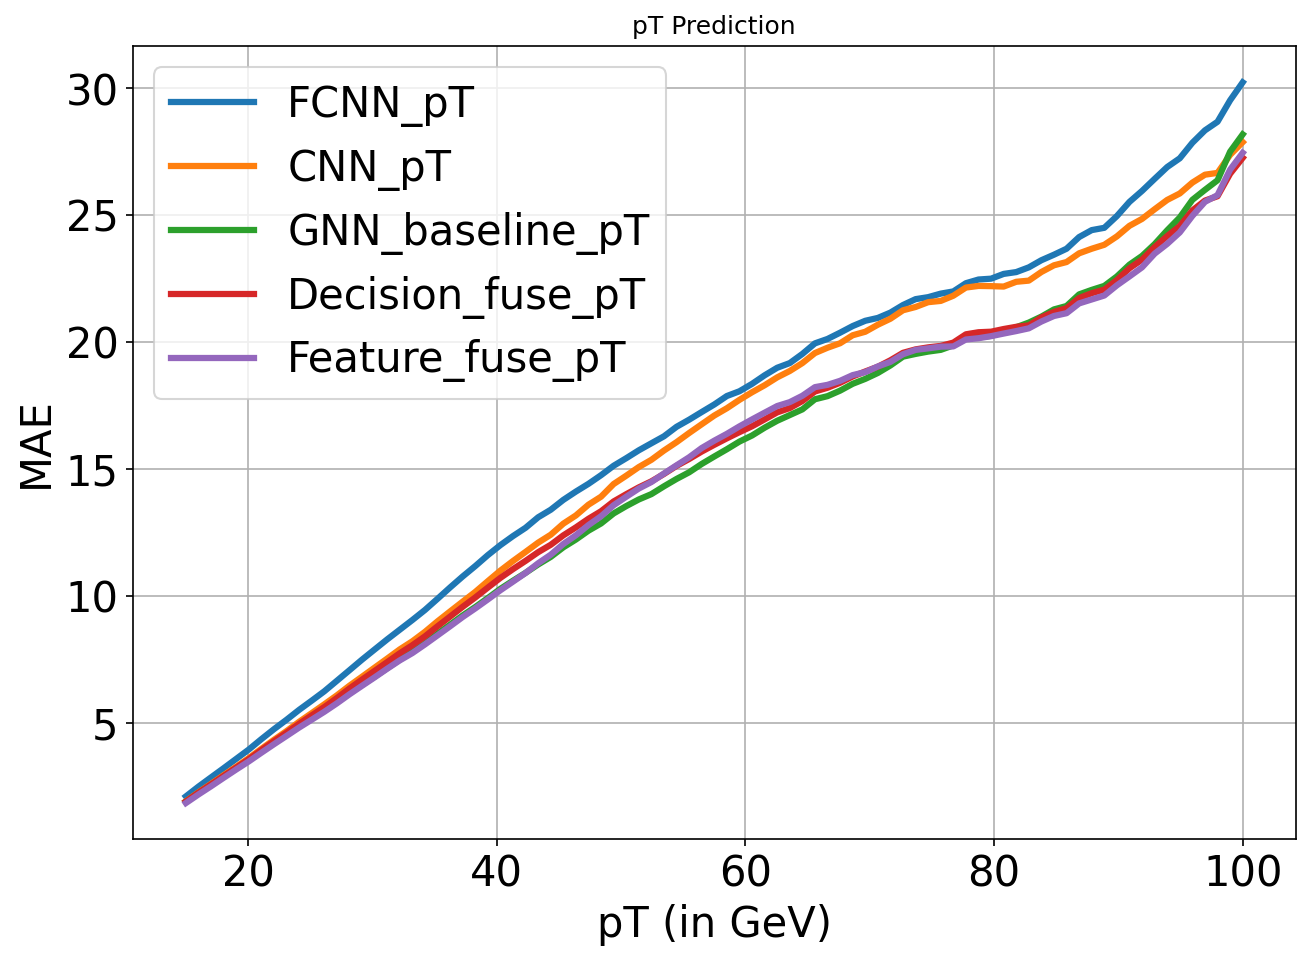

In [100]:
pev_axis = np.linspace(15,100,len(mae_fcnn_pT_ptloss)) 
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,mae_fcnn_pT_ptloss, label = 'FCNN_pT', linewidth = 3)
axs.plot(pev_axis,mae_cnn_pT_ptloss, label = 'CNN_pT', linewidth = 3)
axs.plot(pev_axis,mae_gnn_pT_mse, label = 'GNN_baseline_pT', linewidth = 3)
# axs.plot(pev_axis,mae_gnn_pT_ptloss_graphMod, label = 'GNN_GraphModif_pT', linewidth = 3)
# axs.plot(pev_axis,mae_gnn_pT_ptloss_multi1, label = 'GNN_Multitask_pT', linewidth = 3)
axs.plot(pev_axis,mae_dec_fuse, label = 'Decision_fuse_pT', linewidth = 3)
axs.plot(pev_axis,mae_feat_fuse, label = 'Feature_fuse_pT', linewidth = 3)
# axs.plot(pev_axis,mae_gnn_pT_ptloss_multi2, label = 'GNN_pT_MSE_custom_Multitask2')
# axs.plot(pev_axis,mae_gnn_pT_ptloss_multi4, label = 'GNN_pT_MSE_custom_Multitask3')
# axs.plot(pev_axis,mae_gnn_pT_ptloss_multi5, label = 'GNN_pT_MSE_custom_Multitask4')
# axs.plot(pev_axis,mae_gnn_pT_ptloss, label = 'GNN_pT_pTLoss')
axs.set_xlabel('pT (in GeV)', fontsize=20)
axs.set_ylabel('MAE', fontsize=20)
axs.tick_params(axis='both', labelsize=20)
fig.set_dpi(150)
axs.grid(True)
axs.legend(prop={'size': 20})
axs.set_title('pT Prediction')
# axs.set_ylim([-0.01,0.1])

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

In [102]:
# fig, axs = plt.subplots(1, 1)
# axs.plot(pev_axis,mae_fcnn_inv_ptloss, label = 'FCNN_1/pT')
# axs.plot(pev_axis,mae_cnn_inv_ptloss, label = 'CNN_1/pT')
# axs.plot(pev_axis,mae_gnn_inv_mse, label = 'GNN_baseline_1/pT')
# axs.plot(pev_axis,mae_dec_fuse_inv, label = 'Decision_fuse_1/pT')
# axs.plot(pev_axis,mae_feat_fuse_inv, label = 'Feature_fuse_1/pT')
# # axs.plot(pev_axis,mae_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
# axs.set_xlabel('pT (in GeV)')
# axs.set_ylabel('MAE')
# fig.set_dpi(150)
# axs.legend()
# axs.set_title('1/pT Prediction')
# axs.set_ylim([-0.01,200])

# fig = plt.gcf()
# fig.set_size_inches(10, 7)  # 9.25, 5.25
# plt.show()

In [28]:
def f1_comp(y_true,y_pred,inv):
    if inv == 1:
        y_true = 1/y_true
        y_pred = 1/y_pred
        
    f1 = []
    for i in tqdm(range(2,100),position=0):
        grnd = y_true >= i
        pred = y_pred >= i
        f1.append(f1_score(1*grnd,1*pred))
    return f1

In [29]:
f1_fcnn_inv_ptloss = f1_comp(inv_pT_ts,pred_fcnn_inv_ptloss,1)
f1_fcnn_pT_ptloss = f1_comp(pT_ts,pred_fcnn_pT_ptloss,0)
f1_cnn_inv_ptloss = f1_comp(inv_pT_ts,pred_cnn_inv_ptloss,1)
f1_cnn_pT_ptloss = f1_comp(pT_ts,pred_cnn_pT_ptloss,0)

f1_gnn_inv_mse = f1_comp(inv_pT_ts,pred_gnn_inv_mse,1)
f1_gnn_pT_mse = f1_comp(pT_ts,pred_gnn_pT_mse,0)
f1_gnn_inv_ptloss = f1_comp(inv_pT_ts,pred_gnn_inv_ptloss,1)
f1_gnn_pT_ptloss = f1_comp(pT_ts,pred_gnn_pT_ptloss,0)
# f1_gnn_inv_ptloss_graphMod = f1_comp(inv_pT_ts,pred_gnn_inv_ptloss_graphModif,1)
f1_gnn_pT_ptloss_graphMod = f1_comp(pT_ts,pred_gnn_pT_ptloss_graphModif,0)
f1_gnn_pT_ptloss_multi1 = f1_comp(pT_ts,pred_gnn_pT_ptloss_multi1,0)
f1_gnn_inv_ptloss_multi1 = f1_comp(pT_ts,pred_gnn_inv_ptloss_multi1,0)
f1_feat_fuse = f1_comp(pT_ts,pred_feat_fuse,0)
f1_feat_fuse_inv = f1_comp(pT_ts,pred_feat_fuse_inv,0)
f1_dec_fuse = f1_comp(pT_ts,pred_dec_fuse,0)
f1_dec_fuse_inv = f1_comp(pT_ts,pred_dec_fuse_inv,0)

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [00:04<00:00, 21.63it/s]


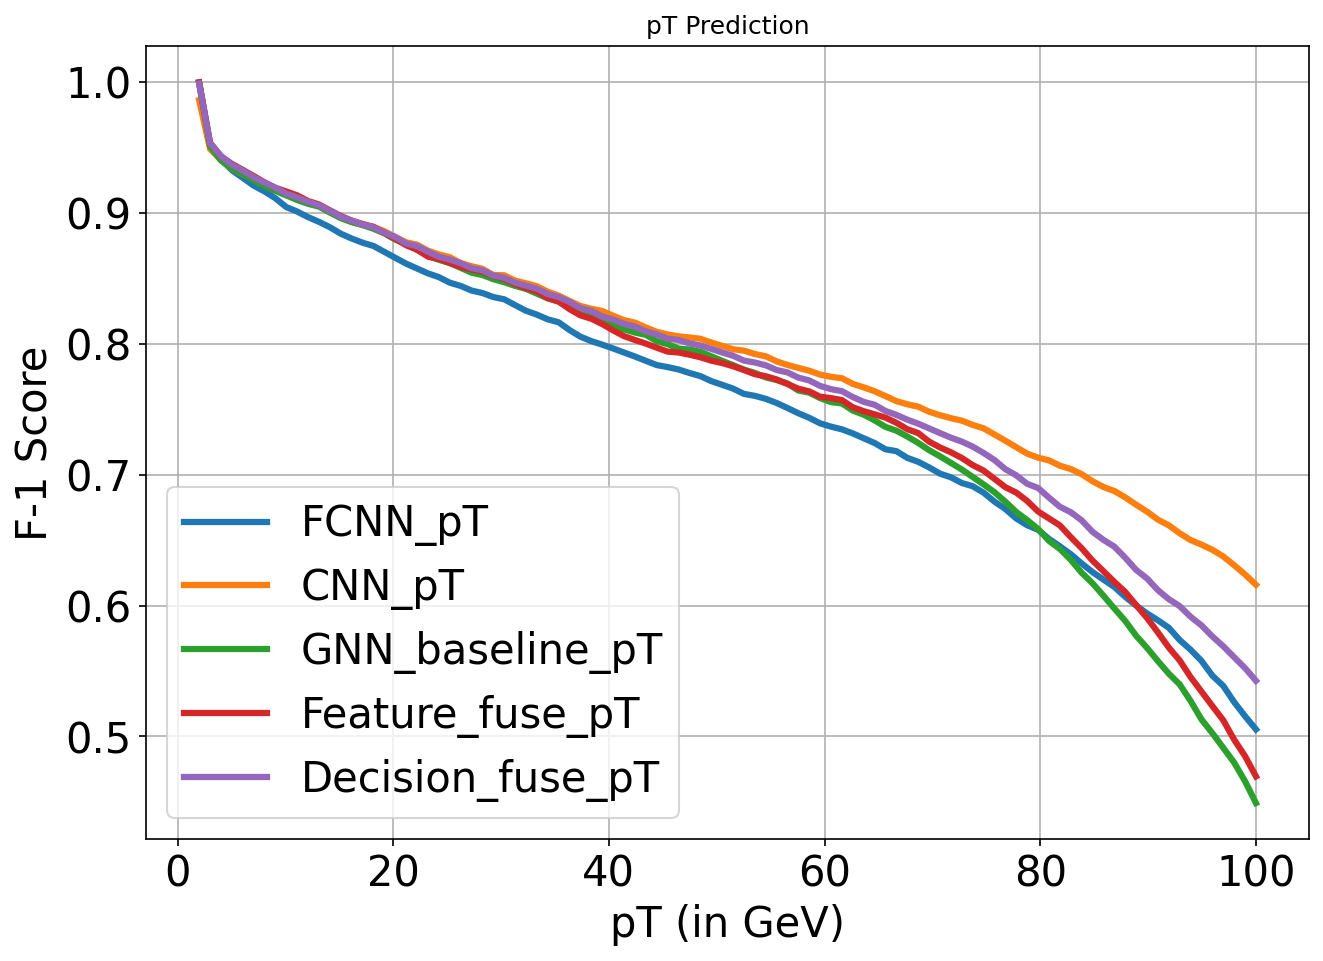

In [96]:
pev_axis = np.linspace(2,100,len(f1_fcnn_inv_ptloss)) 
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,f1_fcnn_pT_ptloss, label = 'FCNN_pT', linewidth = 3)
axs.plot(pev_axis,f1_cnn_pT_ptloss, label = 'CNN_pT', linewidth = 3)
axs.plot(pev_axis,f1_gnn_pT_mse, label = 'GNN_baseline_pT', linewidth = 3)
# axs.plot(pev_axis,f1_gnn_pT_ptloss, label = 'GNN_pT_pTLoss')
# axs.plot(pev_axis,f1_gnn_pT_ptloss_graphMod, label = 'GNN_GraphModif_pT', linewidth = 3)
# axs.plot(pev_axis,f1_gnn_pT_ptloss_multi1, label = 'GNN_Multitask_pT', linewidth = 3)
axs.plot(pev_axis,f1_feat_fuse, label = 'Feature_fuse_pT', linewidth = 3)
axs.plot(pev_axis,f1_dec_fuse, label = 'Decision_fuse_pT', linewidth = 3)
axs.set_xlabel('pT (in GeV)', fontsize = 20)
axs.set_ylabel('F-1 Score', fontsize = 20)
fig.set_dpi(150)
axs.grid(which='both')
axs.legend(prop={'size': 20})
axs.tick_params(axis='both', labelsize=20)
# axs.set_ylim([-0.01,0.05])
axs.set_title('pT Prediction')

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

In [98]:
# fig, axs = plt.subplots(1, 1)
# axs.plot(pev_axis,f1_fcnn_inv_ptloss, label = 'FCNN_1/pT')
# axs.plot(pev_axis,f1_cnn_inv_ptloss, label = 'CNN_1/pT')
# axs.plot(pev_axis,f1_gnn_inv_mse, label = 'GNN_baseline_1/pT')
# # axs.plot(pev_axis,f1_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
# # axs.plot(pev_axis,f1_gnn_inv_ptloss_graphMod, label = 'GNN_1/pT_MSE_custom_graphModif')
# axs.plot(pev_axis,f1_feat_fuse_inv, label = 'Feature_fuse_1/pT')
# axs.plot(pev_axis,f1_dec_fuse_inv, label = 'Decision_fuse_1/pT')
# axs.set_xlabel('pT (in GeV)')
# axs.set_ylabel('F-1 Score')
# fig.set_dpi(150)
# axs.legend()
# axs.grid(which='both')
# # axs.set_ylim([-0.01,0.05])
# axs.set_title('1/pT Prediction')

# fig = plt.gcf()
# fig.set_size_inches(10, 7)  # 9.25, 5.25
# plt.show()

In [15]:
def acc_comp(y_true,y_pred,inv):
    if inv == 1:
        y_true = 1/y_true
        y_pred = 1/y_pred
        
    acc = []
    for i in tqdm(range(5,100),position=0):
        grnd = y_true >= i
        pred = y_pred >= i
        cmp = np.sum(np.equal(grnd,np.squeeze(pred))) 
        acc.append(cmp/len(grnd)*100)
    return acc

In [92]:
acc_fcnn_inv_ptloss = acc_comp(inv_pT_ts,pred_fcnn_inv_ptloss,1)
acc_fcnn_pT_ptloss = acc_comp(pT_ts,pred_fcnn_pT_ptloss,0)
acc_cnn_inv_ptloss = acc_comp(inv_pT_ts,pred_cnn_inv_ptloss,1)
acc_cnn_pT_ptloss = acc_comp(pT_ts,pred_cnn_pT_ptloss,0)

acc_gnn_inv_mse = acc_comp(inv_pT_ts,pred_gnn_inv_mse,1)
acc_gnn_pT_mse = acc_comp(pT_ts,pred_gnn_pT_mse,0)
# acc_gnn_inv_ptloss = acc_comp(inv_pT_ts,pred_gnn_inv_ptloss,1)
# acc_gnn_pT_ptloss = acc_comp(pT_ts,pred_gnn_pT_ptloss,0)
# acc_gnn_inv_ptloss_graphMod = acc_comp(inv_pT_ts,pred_gnn_inv_ptloss_graphModif,1)
acc_gnn_pT_ptloss_graphMod = acc_comp(pT_ts,pred_gnn_pT_ptloss_graphModif,0)
acc_gnn_pT_ptloss_multi1 = acc_comp(pT_ts,pred_gnn_pT_ptloss_multi1,0)
acc_gnn_inv_ptloss_multi1 = acc_comp(pT_ts,pred_gnn_inv_ptloss_multi1,0)
# acc_gnn_pT_ptloss_multi2 = acc_comp(pT_ts,pred_gnn_pT_ptloss_multi2,0)
# acc_gnn_pT_ptloss_multi3 = acc_comp(pT_ts,pred_gnn_pT_ptloss_multi4,0)
# acc_gnn_pT_ptloss_multi4 = acc_comp(pT_ts,pred_gnn_pT_ptloss_multi5,0)
acc_dec_fuse = acc_comp(pT_ts,pred_dec_fuse,0)
acc_dec_fuse_inv = acc_comp(pT_ts,pred_dec_fuse_inv,0)
acc_feat_fuse = acc_comp(pT_ts,pred_feat_fuse,0)
acc_feat_fuse_inv = acc_comp(pT_ts,pred_feat_fuse_inv,0)

100%|████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 1697.56it/s]


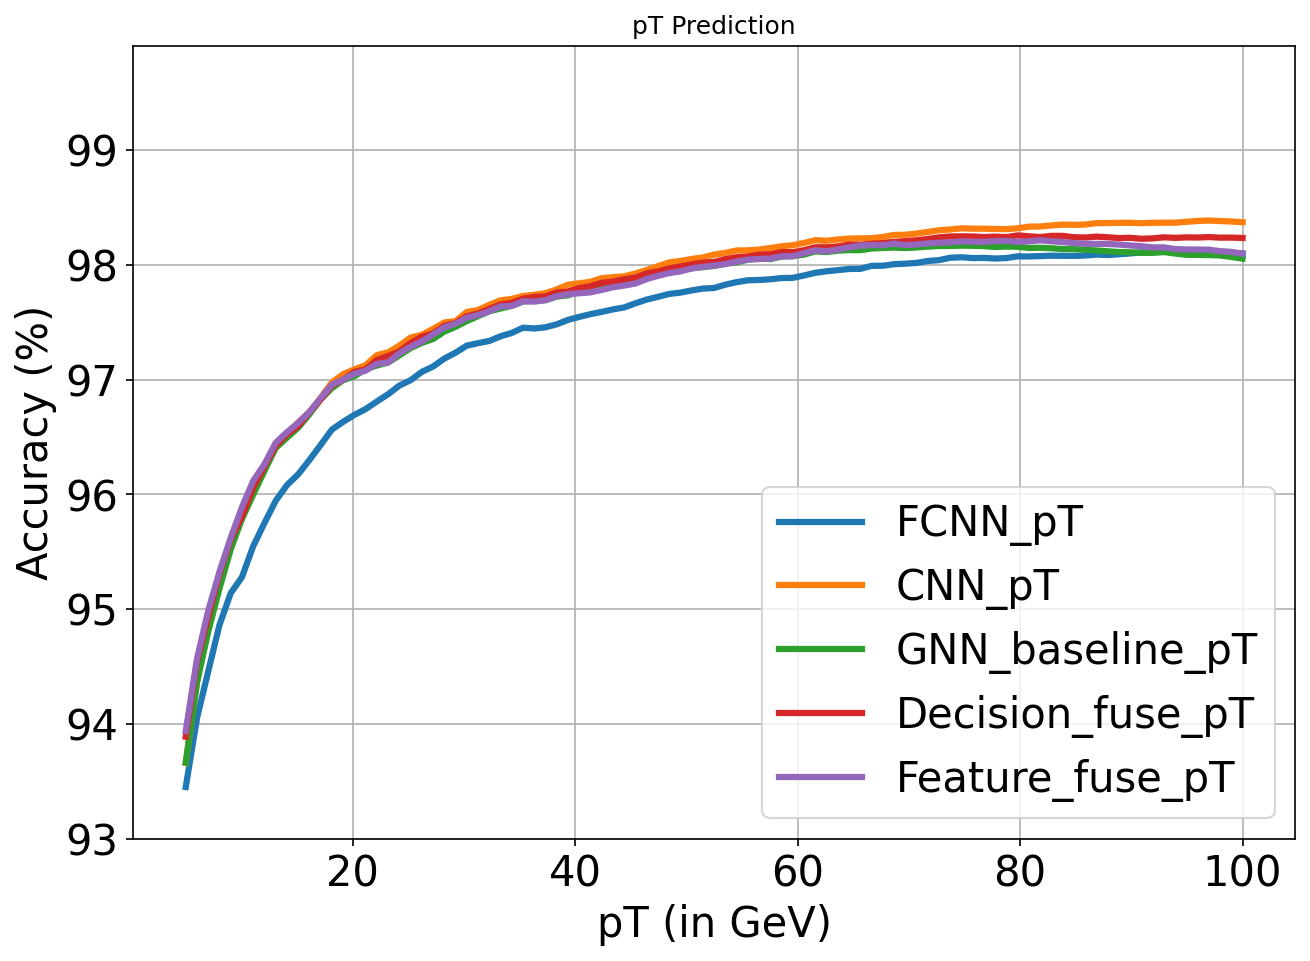

In [93]:
pev_axis = np.linspace(5,100,len(acc_fcnn_inv_ptloss)) 
fig, axs = plt.subplots(1, 1)
axs.plot(pev_axis,acc_fcnn_pT_ptloss, label = 'FCNN_pT', linewidth = 3)
axs.plot(pev_axis,acc_cnn_pT_ptloss, label = 'CNN_pT', linewidth = 3)
axs.plot(pev_axis,acc_gnn_pT_mse, label = 'GNN_baseline_pT', linewidth = 3)
# axs.plot(pev_axis,acc_gnn_pT_ptloss_graphMod, label = 'GNN_GraphModif_pT', linewidth = 3)
# axs.plot(pev_axis,acc_gnn_pT_ptloss_multi1, label = 'GNN_Multitask_pT', linewidth = 3)
# axs.plot(pev_axis,acc_gnn_pT_ptloss_multi2, label = 'GNN_pT_MSE_custom_Multitask2')
# axs.plot(pev_axis,acc_gnn_pT_ptloss_multi3, label = 'GNN_pT_MSE_custom_Multitask3')
# axs.plot(pev_axis,acc_gnn_pT_ptloss_multi4, label = 'GNN_pT_MSE_custom_Multitask4')
axs.plot(pev_axis,acc_dec_fuse, label = 'Decision_fuse_pT', linewidth = 3)
axs.plot(pev_axis,acc_feat_fuse, label = 'Feature_fuse_pT', linewidth = 3)
# axs.plot(pev_axis,acc_gnn_pT_ptloss, label = 'GNN_pT_pTLoss')
axs.set_xlabel('pT (in GeV)', fontsize = 20)
axs.set_ylabel('Accuracy (%)', fontsize = 20)
axs.set_title('pT Prediction')
fig.set_dpi(150)
axs.legend()
axs.grid(which='both')
axs.legend(prop={'size': 20})
axs.tick_params(axis='both', labelsize=20)
axs.set_ylim([93,99.9])

fig = plt.gcf()
fig.set_size_inches(10, 7)  # 9.25, 5.25
plt.show()

In [103]:
# fig, axs = plt.subplots(1, 1)
# axs.plot(pev_axis,acc_fcnn_inv_ptloss, label = 'FCNN_1/pT', linewidth = 3)
# axs.plot(pev_axis,acc_cnn_inv_ptloss, label = 'CNN_1/pT', linewidth = 3)
# axs.plot(pev_axis,acc_gnn_inv_mse, label = 'GNN_baseline_1/pT', linewidth = 3)
# # axs.plot(pev_axis,acc_gnn_inv_ptloss, label = 'GNN_1/pT_pTLoss')
# # axs.plot(pev_axis,acc_gnn_inv_ptloss_graphMod, label = 'GNN_1/pT_MSE_custom_graphModif')
# axs.plot(pev_axis,acc_feat_fuse_inv, label = 'Feature_fuse_1/pT', linewidth = 3)
# axs.plot(pev_axis,acc_dec_fuse_inv, label = 'Decision_fuse_1/pT', linewidth = 3)
# axs.set_xlabel('pT (in GeV)', fontsize = 20)
# axs.set_ylabel('Accuracy (%)', fontsize = 20)
# axs.set_title('1/pT Prediction')
# fig.set_dpi(150)
# axs.legend()
# axs.grid(which='both')
# axs.legend(prop={'size': 20})
# axs.tick_params(axis='both', labelsize=20)
# axs.set_ylim([83,100])

# fig = plt.gcf()
# fig.set_size_inches(10, 7)  # 9.25, 5.25
# plt.show()